## 1 Tratamento dos dados

In [154]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/LocTreino_Equipe_4.csv')
bts = pd.read_csv('data/Dados_BTSs.csv')

df.head()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,2818,-8.062.787,-34.897.289,131.79,105.09,125.656.666.666.667,105.756.666.666.667,128.49,115.99,1,2,3,2,1,0
1,212,-8.076.408,-34.899.723,120.59,112.123.333.333.333,124.856.666.666.667,132.023.333.333.333,135.523.333.333.333,141.19,2,1,1,1,2,2
2,500,-8.074.771,-34.890.739,118.723.333.333.333,128.556.666.666.667,130.09,989.566.666.666.667,128.59,146.423.333.333.333,1,0,3,0,1,2
3,2094,-806.803,-34.896.683,111.49,109.723.333.333.333,108.056.666.666.667,973.566.666.666.667,118.456.666.666.667,997.233.333.333.333,0,1,2,1,1,0
4,1790,-8.069.077,-34.900.505,123.29,114.34,121.79,126.09,130.09,109.04,1,1,2,1,2,1


In [155]:
bts

,name,lat,lon,band,bcch,eirp,bts
0,136_2,-8.068.361.111,-34.892.722.222,GSM1800,662,55.59,BTS-1
1,137_3,-8.075.916.667,-34.894.611.111,GSM1800,806,55.59,BTS-2
2,197_1,-8.076.361.111,-34.908,GSM1800,666,55.59,BTS-3
3,137_1,-8.075.916.667,-348.946.111.116,GSM1800,690,55.59,BTS-4
4,138_2,-8.066,-348.894.444.444.444,GSM1800,673,55.59,BTS-5
5,245_2,-806.458.333.333.333,-348.945.833.333.333,GSM1800,682,55.59,BTS-6


#### Observacoes

- As colunas de "lat" e "lon" em ambos os Dataframes estão com valores desformatados.
- As colunas de "pathBTSn" precisam de uma formatacao igual as colunas de "lat" e "lon".


In [158]:
def format_cols(x):
    if 'nan' in str(x).lower():
        return np.nan
    value = str(x)
    value = value.split('.')
    value = value[0] + '.' + ''.join(value[1:])
    value = float(value)
    return value

def correct_lats(x):
    if np.abs(x) > 90:
        x = x/100
    elif np.abs(x) > 10:
        x = x/10
    return x

def correct_lons(x):
    if np.abs(x) > 180:
        x = x/100
    if np.abs(x) < 10:
        x = x*10
    return x

def format_taBTS1(x):
    value = str(x)
    if '.' in value:
        value = value.split('.')
        value = value[0] + '.' + ''.join(value[1:])
        value = float(value)
    else:
        value = float(value)
    
    if value > 10:
        # outliers
        value = np.nan

    return value

df['lat'] = df['lat'].apply(format_cols)
df['lat'] = df['lat'].apply(correct_lats)
df['lon'] = df['lon'].apply(format_cols)
df['lon'] = df['lon'].apply(correct_lons)

bts['lat'] = bts['lat'].apply(format_cols)
bts['lat'] = bts['lat'].apply(correct_lats)
bts['lon'] = bts['lon'].apply(format_cols)
bts['lon'] = bts['lon'].apply(correct_lons)

for i in range(1, 7):
    df[f'pathBTS{i}'] = df[f'pathBTS{i}'].apply(format_cols)
    df[f'pathBTS{i}'] = df[f'pathBTS{i}'].apply(lambda x: np.round(x, 6))

df['taBTS1'] = df['taBTS1'].apply(format_taBTS1)

df_nan = df[df['taBTS1'].isna()]
df_nan = df_nan.append(df[df['pathBTS1'].isna()])
df_nan

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
153,595,-8.074224,-34.890263,103.223333,142.323333,124.390000,121.890000,122.556667,136.223333,NaN,0,3,0,1,2
702,1977,-8.068580,-34.897083,118.540000,120.840000,118.740000,112.190000,123.740000,102.490000,NaN,1,2,1,1,0
1294,1663,-8.069399,-34.891121,104.523333,135.090000,124.190000,119.823333,105.390000,128.856667,NaN,1,3,1,0,1
1316,1597,-8.069582,-34.896412,110.423333,999.233333,114.590000,899.566667,113.156667,117.223333,NaN,1,2,1,1,1
1499,2241,-8.066870,-34.894665,122.023333,127.690000,127.056667,125.990000,125.356667,954.233333,NaN,1,3,1,1,0
269,2442,-8.065791,-34.893631,NaN,120.940000,125.640000,125.290000,120.740000,115.840000,0.0,2,3,2,0,0


In [160]:
def format_data(df):
    def format_cols(x):
        if 'nan' in str(x).lower():
            return np.nan
        value = str(x)
        value = value.split('.')
        value = value[0] + '.' + ''.join(value[1:])
        value = float(value)
        return value

    def correct_lats(x):
        if np.abs(x) > 90:
            x = x/100
        elif np.abs(x) > 10:
            x = x/10
        return x

    def correct_lons(x):
        if np.abs(x) > 180:
            x = x/100
        if np.abs(x) < 10:
            x = x*10
        return x

    def format_taBTS1(x):
        value = str(x)
        if '.' in value:
            value = value.split('.')
            value = value[0] + '.' + ''.join(value[1:])
            value = float(value)
        else:
            value = float(value)
        
        if value > 10:
            # outliers
            value = np.nan

        return value

    df['lat'] = df['lat'].apply(format_cols)
    df['lat'] = df['lat'].apply(correct_lats)
    df['lon'] = df['lon'].apply(format_cols)
    df['lon'] = df['lon'].apply(correct_lons)

    bts['lat'] = bts['lat'].apply(format_cols)
    bts['lat'] = bts['lat'].apply(correct_lats)
    bts['lon'] = bts['lon'].apply(format_cols)
    bts['lon'] = bts['lon'].apply(correct_lons)

    for i in range(1, 7):
        df[f'pathBTS{i}'] = df[f'pathBTS{i}'].apply(format_cols)
        df[f'pathBTS{i}'] = df[f'pathBTS{i}'].apply(lambda x: np.round(x, 6))

    df['taBTS1'] = df['taBTS1'].apply(format_taBTS1)

    df_nan = df[df['taBTS1'].isna()]
    df_nan = df_nan.append(df[df['pathBTS1'].isna()])
    df = df.drop(df_nan.index)

    return df

Decidimos optar por dropar as linhas com valores NaN

In [161]:
df = df.drop(df_nan.index)
df.describe()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1468.635877,-8.070097,-34.895126,142.914764,153.502501,135.817031,156.207344,140.815007,142.008707,0.676037,1.016734,2.479250,1.016734,1.139224,1.063588
std,856.699580,0.004288,0.004308,144.435262,160.821598,98.801912,175.798372,120.517006,116.903139,0.702689,0.835651,0.957523,0.835651,0.835836,0.681277
min,2.000000,-8.077570,-34.906830,85.590000,13.328756,88.340000,85.340000,1.260525,1.084025,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,721.500000,-8.073285,-34.898086,107.990000,113.044167,119.165000,108.744167,115.140000,115.498333,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1438.000000,-8.069998,-34.895716,118.406667,121.206666,124.219167,118.173333,124.223333,129.044167,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2233.750000,-8.066894,-34.891978,126.223333,129.302500,130.262917,127.656667,131.390000,136.348333,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2956.000000,-8.059338,-34.885067,999.233333,999.636842,980.717204,998.566667,999.566667,997.233333,3.000000,4.000000,5.000000,4.000000,3.000000,2.000000


In [162]:
bts.describe()

,lat,lon,bcch,eirp
count,6.000000,6.000000,6.000000,6.000000e+00
mean,-8.071190,-34.895662,696.500000,5.559000e+01
std,0.005477,0.006370,54.617763,7.783606e-15
min,-8.076361,-34.908000,662.000000,5.559000e+01
25%,-8.075917,-34.894611,667.750000,5.559000e+01
50%,-8.072139,-34.894597,677.500000,5.559000e+01
75%,-8.066590,-34.893187,688.000000,5.559000e+01
max,-8.064583,-34.889444,806.000000,5.559000e+01


## 2.1 Definição do problema

Localizar as coordenadas (latitude e longitude) de um dispositivo móvel com base nas perdas e timing advance dos sinais para as estações de rádio base.
A base de dados fornece dados para 6 estações de rádio base e cada linha dispõe um registro dos sinais de um dispositivo para as estações.


## 2.2 Ferramentas Utilizadas

Foi usada a linguagem de programação Python em conjunto com a biblioteca scikit-learn devido a sua facilidade de uso na implementação da regressão linear. Também foram usadas as bibliotecas numpy para a manipulação matemática e pandas para manipulação de dados e para o cálculo das estatísticas apresentadas na seção “Resultados”, para os plots de gráficos foi utilizada a biblioteca matplotlib.

Utilizamos também a biblioteca do Tensorflow para construir e treinar a rede neural.


## 2.3 Apresentação da solução

#### Abordagem 1

Dado que precisamos criar um método para localizar o dispositivo móvel com base nos parâmetros de *pathBTSn* (perda em espaço livre até a estação rádio base **n**) e *taBTSn* (timing advance para a estação de rádio base **n**), optamos por, primeiramente, fazer a predição da distância para cada estação rádio base por meio de um modelo de regressão linear para cada uma das estações. Com as distâncias, podemos então descobrir as coordenadas do dispositivo através de alguns métodos de localização. Os métodos escolhidos foram:

#### Abordagem 2

Decidimos criar uma rede neural para analisar as features de pathBTSn e taBTSn e dar como resultado as coordenadas do alvo móvel.


### Abordagem 1 - Localização com multilateração

In [164]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """Calcula distance entre duas coordenadas em metros."""
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    m = 6367 * c * 1000
    return m

distance = pd.DataFrame(columns=['pontoId', 'BTS1', 'BTS2', 'BTS3', 'BTS4', 'BTS5', 'BTS6'])

for i, row in df.iterrows():
    lat, lon = row['lat'], row['lon']
    pontoId = row['pontoId']
    
    # calcula distancia para bts1
    lat1, lon1 = bts['lat'][0], bts['lon'][0]
    bts1 = calculate_distance(lat, lon, lat1, lon1)

    # calcula distancia para bts2
    lat2, lon2 = bts['lat'][1], bts['lon'][1]
    bts2 = calculate_distance(lat, lon, lat2, lon2)

    # calcula distancia para bts3
    lat3, lon3 = bts['lat'][2], bts['lon'][2]
    bts3 = calculate_distance(lat, lon, lat3, lon3)

    # calcula distancia para bts4
    lat4, lon4 = bts['lat'][3], bts['lon'][3]
    bts4 = calculate_distance(lat, lon, lat4, lon4)

    # calcula distancia para bts5
    lat5, lon5 = bts['lat'][4], bts['lon'][4]
    bts5 = calculate_distance(lat, lon, lat5, lon5)

    # calcula distancia para bts6
    lat6, lon6 = bts['lat'][5], bts['lon'][5]
    bts6 = calculate_distance(lat, lon, lat6, lon6)

    distance.loc[i] = [pontoId, bts1, bts2, bts3, bts4, bts5, bts6]

distance.describe()

,pontoId,BTS1,BTS2,BTS3,BTS4,BTS5,BTS6
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1468.635877,665.232846,825.940913,1644.888518,825.940905,921.526199,838.180627
std,856.699580,340.849074,436.795117,486.453827,436.795124,447.771958,357.776039
min,2.000000,54.400367,14.389653,868.810231,14.389680,26.300910,29.071721
25%,721.500000,385.688480,538.732883,1308.892940,538.732821,565.547572,587.393182
50%,1438.000000,610.147924,735.748535,1636.622061,735.748523,897.804877,814.337814
75%,2233.750000,912.653020,1031.546589,1968.234782,1031.546568,1303.567851,1136.586361
max,2956.000000,1847.919184,2280.672970,2834.056778,2280.672931,2051.135530,1533.465918


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train_arr = []
X_test_arr = []
y_train_arr = []
y_test_arr = []

lb = LabelEncoder()

for i in range(6):
    # select cols from df
    cols = [f'pathBTS{i+1}', f'taBTS{i+1}']
    X = df.copy()[cols]
    X[f'pathBTS{i+1}'] = lb.fit_transform(X[f'pathBTS{i+1}'])
    X[f'taBTS{i+1}'] = lb.fit_transform(X[f'taBTS{i+1}'])
    y = distance[f'BTS{i+1}']
    y = lb.fit_transform(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_arr.append(x_train)
    X_test_arr.append(x_test)
    y_train_arr.append(y_train)
    y_test_arr.append(y_test)


In [166]:
from sklearn.neighbors import KNeighborsRegressor

knns = []
for i in range(6):
    model = KNeighborsRegressor()
    knns.append(model)


In [9]:
# achar melhores parametros para cada knn
from sklearn.model_selection import GridSearchCV, RepeatedKFold

parameters = {'n_neighbors': list(range(1, 41))}

grids = []
for i, model in enumerate(knns):
    grid = GridSearchCV(
        model,
        parameters,
        cv=RepeatedKFold(n_splits=5, n_repeats=10),
        scoring='neg_mean_squared_error',
        return_train_score=True,
        refit=True
    )
    grid.fit(X_train_arr[i], y_train_arr[i])
    knns[i] = grid.best_estimator_
    print(f'BTS{i+1} model best params')
    print(grid.best_params_)

BTS1 model best params
{'n_neighbors': 40}
BTS2 model best params
{'n_neighbors': 17}
BTS3 model best params
{'n_neighbors': 2}
BTS4 model best params
{'n_neighbors': 36}
BTS5 model best params
{'n_neighbors': 2}
BTS6 model best params
{'n_neighbors': 24}


In [10]:
from sklearn.metrics import mean_squared_error

for i, model in enumerate(knns):
    pred = model.predict(X_test_arr[i])
    sqrd_error = np.sqrt(mean_squared_error(y_test_arr[i], pred))
    print(f'BTS{i+1} erro medio: {sqrd_error} m')


BTS1 erro medio: 396.9983853839857 m
BTS2 erro medio: 406.4928066077453 m
BTS3 erro medio: 291.16129349457054 m
BTS4 erro medio: 386.9677836477586 m
BTS5 erro medio: 326.7993807893169 m
BTS6 erro medio: 286.1238865708626 m


In [20]:
from functools import reduce

anchors = bts[['lat', 'lon']]

def multilateracao(coord, *args):
    dist2bts = args[0]
    res = reduce(
        lambda x, y: x + y, 
        [dist2bts[i] - ((a - coord[0]) ** 2 + (b - coord[1]) ** 2) for i, (a, b) in enumerate(anchors.values)]
    )
    return res
    

In [23]:
from random import sample
from scipy import optimize

# dataset de treino
train_index = sample(list(df.index), int(len(df) * 0.1))
train_df = df.loc[train_index]
test_df = df.drop(train_index)
train_df.head()

predictions = []

bounds = [(-33.7683777809, 5.24448639569), (-73.9872354804, -34.7299934555)]    # bounding box do Brasil - fonte: https://gist.github.com/graydon/11198540

for i, row in train_df.iterrows():
    valid_coord = (row['lat'], row['lon'])
    dists = []
    for j in range(6):
        # prevendo distancias de cada alvo para cada bts
        bts_data = pd.DataFrame([row[['pathBTS{}'.format(j+1), 'taBTS{}'.format(j+1)]]], columns=['pathBTS{}'.format(j+1), 'taBTS{}'.format(j+1)])
        dist2bts = knns[j].predict(bts_data)[0]
        dists.append(dist2bts)
    pred_coord = optimize.dual_annealing(multilateracao, bounds, args=(dists,))
    predictions.append(pred_coord)

### Abordagem 2 - Localização com Rede Neural

Nessa abordagem, decidimos utilizar uma rede neural para prever os valores de *latitude* e *longitude* do alvo móvel. 

É uma rede sequencial composta por 2 camadas ocultas com 512 e 256 neurons respectivamente, produzindo dois valores como saída. 

Cada neuron das camadas de entrada e ocultas possui a função de ativação **ReLU** (Rectified Linear Unit), que funciona zerando entradas menores que zero e retornando entradas positivas com base numa função linear, a qual se encaixa muito bem nos problemas de regressão linear. Já na última camada queremos uma função de ativação linear para que possa trazer resultados negativos também.


In [94]:
# Construindo o modelo

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[12]), # para cada bts existe 2 parâmetros

    # hidden layers
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),

    layers.Dense(2, activation='linear')
])

model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error'],
    run_eagerly=True
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                416       
                                                                 
 dense_57 (Dense)            (None, 512)               16896     
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 2)                 514       
                                                                 
Total params: 149,154
Trainable params: 149,154
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Datasets de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

TEST_SIZE = 0.1

lat_scalar = StandardScaler()
lon_scalar = StandardScaler()

def preprocess_coord(df):
    df['lat'] = df['lat'].astype(float)
    df['lon'] = df['lon'].astype(float)
    df['lat'] = lat_scalar.fit_transform(df['lat'].values.reshape(-1, 1))
    df['lon'] = lon_scalar.fit_transform(df['lon'].values.reshape(-1, 1))
    return df

df = preprocess_coord(df)

X_train, X_test, y_train, y_test = train_test_split(
    df[['pathBTS1', 'pathBTS2', 'pathBTS3', 'pathBTS4', 'pathBTS5', 'pathBTS6', 'taBTS1', 'taBTS2', 'taBTS3', 'taBTS4', 'taBTS5', 'taBTS6']],
    df[['lat', 'lon']],
    test_size = TEST_SIZE,
    random_state = 42 
)

ct = ColumnTransformer([
    ('pathBTS', StandardScaler(), ['pathBTS1', 'pathBTS2', 'pathBTS3', 'pathBTS4', 'pathBTS5', 'pathBTS6']),
    ('taBTS', StandardScaler(), ['taBTS1', 'taBTS2', 'taBTS3', 'taBTS4', 'taBTS5', 'taBTS6'])
])
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
y_train_index, y_train = y_train.index, y_train.values
y_test_index, y_test = y_test.index, y_test.values

X_train.shape

(1344, 12)

In [108]:
# Treinando o modelo

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs          = 100,
    verbose         = 0,
    batch_size      = 64,
)

Epoch 1/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 4/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 5/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 6/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 7/100
21/21 [=========

Erro mínimo: 0.010872234590351582


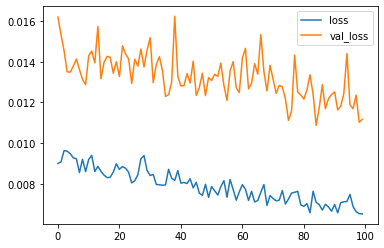

In [109]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Erro mínimo: {}".format(history_df['val_loss'].min()))

### 2.4 Resultados

In [111]:
# Output
import csv

df = pd.read_csv('data/LocTreino_Equipe_4.csv')
df = format_data(df)

writer = csv.writer(open('data/Resultados_Equipe4_Metodo_RedesNeurais.csv', 'w'))
writer.writerow(['pontoId', 'lat_pred', 'lon_pred'])

data = ct.fit_transform(df.drop(['pontoId','lat', 'lon'], axis=1))

for i, row in df.iterrows():
    pontoId = row['pontoId']
    input_data = data[i:i+1]
    try:
        pred_coord = model.predict(input_data)[0]
    except ValueError:
        break
    lat, lon = lat_scalar.inverse_transform(pred_coord[0].reshape(-1, 1)), lon_scalar.inverse_transform(pred_coord[1].reshape(-1, 1))
    writer.writerow([pontoId, lat[0][0], lon[0][0]])

print('Predições salvas em data/Resultados_Equipe4_Metodo_RedesNeurais.csv')

AttributeError: '_csv.writer' object has no attribute 'path'

Azul		= coordenadas originais
Vermelho	= coordenadas preditas


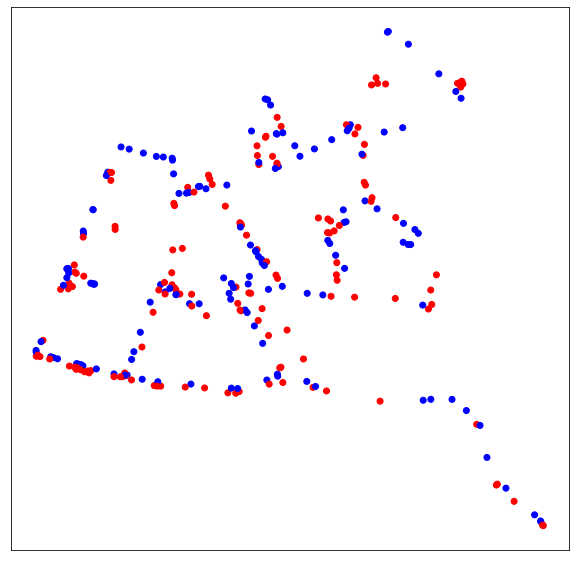

In [148]:
# Plotando os resultados
from random import sample
import matplotlib.pyplot as plt
import matplotlib as mpl

COLOR = 'lightblue'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


pred_df = pd.read_csv('data/Resultados_Equipe4_Metodo_RedesNeurais.csv')
indexes = sample(list(pred_df.index), int(len(pred_df) * 0.1))
pred_df = pred_df.loc[indexes]
pred_df['pontoId'] = pred_df['pontoId'].astype(int)

fig, ax = plt.subplots(figsize=(10, 10))

for i, row in pred_df.iterrows():
    lat, lon = df[df['pontoId'] == row['pontoId']].iloc[0][['lat', 'lon']]
    lat_pred, lon_pred = row['lat_pred'], row['lon_pred']
    ax.scatter([lat, lat_pred], [lon, lon_pred], color=['blue', 'red'], marker="o")
    # ax.scatter(lat_pred, lon_pred, color='red', marker=",")

print('Azul\t\t= coordenadas originais\nVermelho\t= coordenadas preditas')
plt.yticks([])
plt.xticks([])
plt.show()


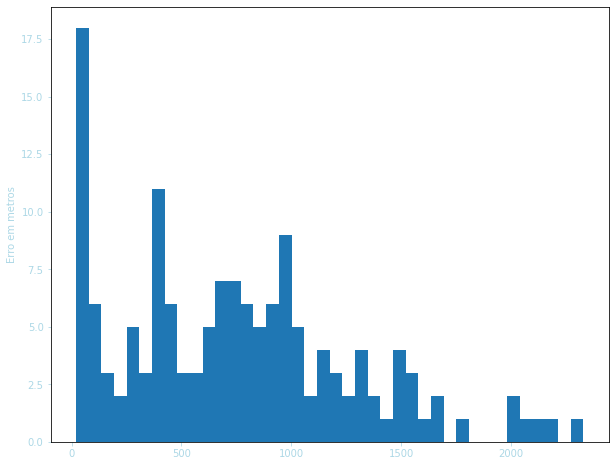

In [149]:
# Histograma dos erros em metros
erros = []
for i, row in pred_df.iterrows():
    lat, lon = df[df['pontoId'] == row['pontoId']].iloc[0][['lat', 'lon']]
    lat_pred, lon_pred = row['lat_pred'], row['lon_pred']
    erro = calculate_distance(lat, lon, lat_pred, lon_pred)
    erros.append(erro)

fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(erros, bins=40)
ax.set_ylabel("Erro em metros")
plt.show()

In [153]:
# Estatisticas
print('Erros de Localização - Estatísticas\n')
print('Média         = {:.2f} m'.format(np.mean(erros)))
print('Desvio padrão = {:.2f} m'.format(np.std(erros)))
print('Mínimo        = {:.2f} m'.format(np.min(erros)))
print('Máximo        = {:.2f} m'.format(np.max(erros)))

Erros de Localização - Estatísticas

Média         = 751.41 m
Desvio padrão = 537.59 m
Mínimo        = 19.87 m
Máximo        = 2328.89 m


### 2.5 Conclusões e principais dificuldades

Neste projeto, foi proposto um algortimo de localização de coordenadas de dispositivos móveis com base nas perdas e timing advance dos sinais para as estações de rádio base usando redes neurais já que houveram complicações e a implementação usando multilateração falhou, porém essa abordagem produziu bons resultados e se mostrou robusta e eficaz.